<a href="https://colab.research.google.com/github/Akash0591/Akash-Reddy-Bommireddy/blob/main/ICP_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Epoch 1/10
235/235 [==============================] - 6s 24ms/step - loss: 0.6943 - val_loss: 0.6942
Epoch 2/10
235/235 [==============================] - 4s 16ms/step - loss: 0.6941 - val_loss: 0.6940
Epoch 3/10
235/235 [==============================] - 4s 16ms/step - loss: 0.6940 - val_loss: 0.6938
Epoch 4/10
235/235 [==============================] - 5s 20ms/step - loss: 0.6938 - val_loss: 0.6937
Epoch 5/10
235/235 [==============================] - 5s 20ms/step - loss: 0.6937 - val_loss: 0.6936
Epoch 6/10
235/235 [==============================] - 4s 16ms/step - loss: 0.6935 - val_loss: 0.6934
Epoch 7/10
235/235 [==============================] - 4s 16ms/step - loss: 0.6934 - val_loss: 0.6933
Epoch 8/10
235/235 [==============================] - 5s 23ms/step - loss: 0.6933 - val_loss: 0.6931
Epoch 9/10
235/235 [==============================] - 4s 16ms/step - loss: 0.6931 - val_loss: 0.6930
Epoch 10/10
235/235 [==============================] - 4s 16ms/step - loss: 0.6930 - val_lo

313/313 [==============================] - 1s 2ms/step


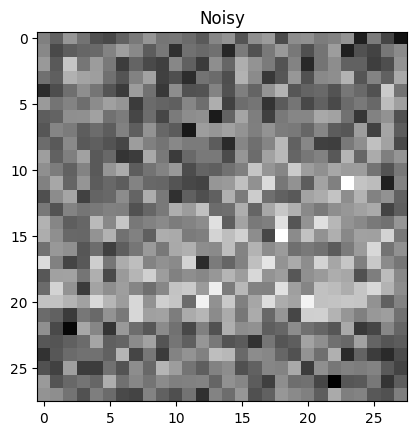

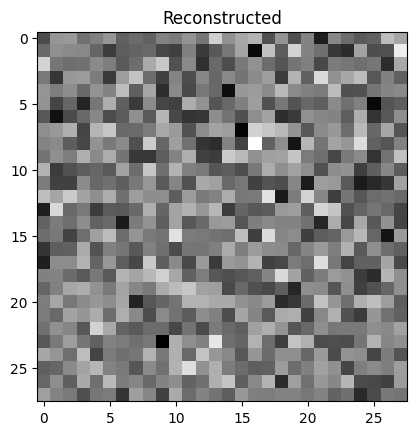

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model

# Model architecture
encoding_dim = 32
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img) # added hidden layer
encoded = Dense(encoding_dim, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(encoded) # added hidden layer
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# Data preprocessing
from keras.datasets import fashion_mnist
import numpy as np
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Introduce noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Train model
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))

# Make predictions
x_test_predicted = autoencoder.predict(x_test_noisy)

# Visualize test data
import matplotlib.pyplot as plt
plt.imshow(x_test_noisy[0].reshape(28, 28))
plt.title("Noisy")
plt.show()

plt.imshow(x_test_predicted[0].reshape(28, 28))
plt.title("Reconstructed")
plt.show()

Epoch 1/10
235/235 [==============================] - 4s 12ms/step - loss: 0.6948 - accuracy: 0.0012 - val_loss: 0.6947 - val_accuracy: 0.0010
Epoch 2/10
235/235 [==============================] - 3s 13ms/step - loss: 0.6947 - accuracy: 0.0012 - val_loss: 0.6946 - val_accuracy: 9.0000e-04
Epoch 3/10
235/235 [==============================] - 4s 18ms/step - loss: 0.6946 - accuracy: 0.0012 - val_loss: 0.6945 - val_accuracy: 9.0000e-04
Epoch 4/10
235/235 [==============================] - 3s 12ms/step - loss: 0.6945 - accuracy: 0.0012 - val_loss: 0.6944 - val_accuracy: 8.0000e-04
Epoch 5/10
235/235 [==============================] - 3s 11ms/step - loss: 0.6944 - accuracy: 0.0012 - val_loss: 0.6943 - val_accuracy: 8.0000e-04
Epoch 6/10
235/235 [==============================] - 3s 12ms/step - loss: 0.6943 - accuracy: 0.0013 - val_loss: 0.6942 - val_accuracy: 9.0000e-04
Epoch 7/10
235/235 [==============================] - 3s 15ms/step - loss: 0.6942 - accuracy: 0.0013 - val_loss: 0.6941 - 

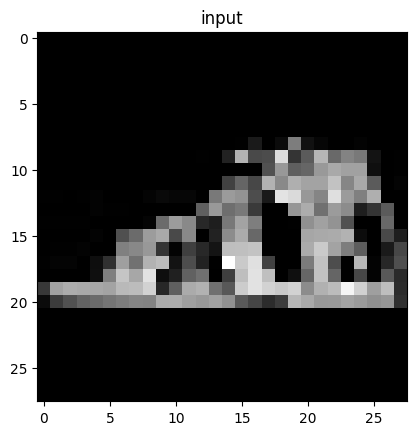

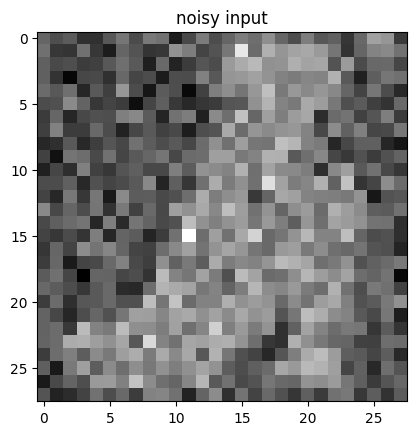

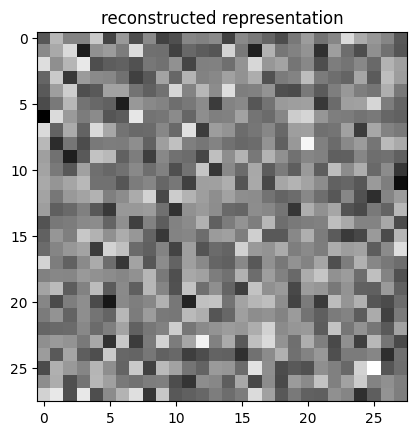

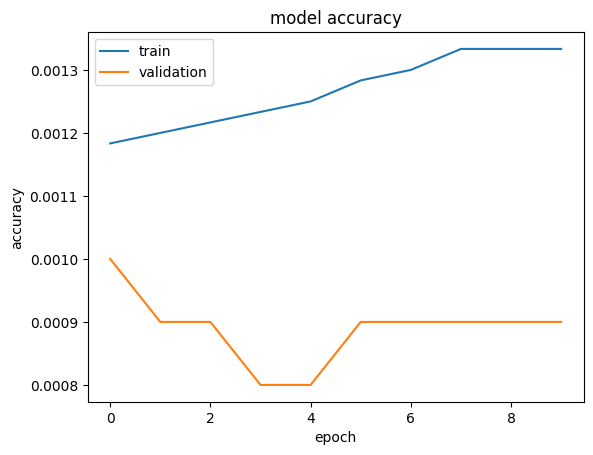

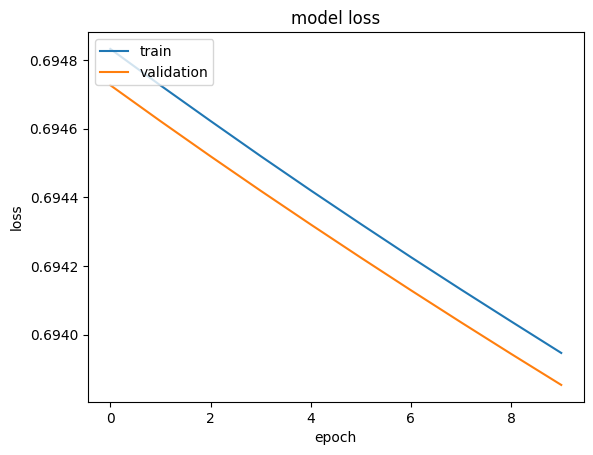

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model
import matplotlib.pyplot as plt
# this is the size of our encoded representations
encoding_dim = 32  # 784 floats -> compression of factor 24.5, assuming the input is 784 floats
# this is our input placeholder
input_img = Input(shape=(784,))
#hidden layer
hidden = Dense(64,activation='relu')(input_img)
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(hidden)
hidden1 = Dense(32,activation='relu')(encoded)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(hidden1)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['accuracy'])
from keras.datasets import fashion_mnist
import numpy as np
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
n = 0.4
noise_train = x_train + n * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
noise_test = x_test + n * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

history = autoencoder.fit(noise_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(noise_test, noise_test))

x_trans = x_test[11][np.newaxis]
x_noise_trans = noise_train[11][np.newaxis]
prediction = autoencoder.predict(x_trans)

plt.imshow(x_test[11].reshape(28, 28), cmap='gray')
plt.title("input")
plt.show()
plt.imshow(x_noise_trans.reshape(28, 28), cmap='gray')
plt.title("noisy input")
plt.show()
plt.imshow(prediction.reshape(28, 28), cmap='gray')
plt.title("reconstructed representation")
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()